In [26]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('online_sales_dataset.csv')
df.head()
conn = sqlite3.connect(':memory:')

# Write DataFrame to SQL table
df.to_sql('my_table', conn, index=False, if_exists='replace')


49782

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [28]:
df.duplicated().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [30]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [31]:
df['ShippingCost']=df['ShippingCost'].fillna(0)

replace the value from null to 0 in ShippingCost column

In [32]:
 query='''
 select * from my_table
 '''
table=pd.read_sql(query,conn)
print(table)

       InvoiceNo StockCode   Description  Quantity       InvoiceDate  \
0         221958  SKU_1964     White Mug        38  2020-01-01 00:00   
1         771155  SKU_1241     White Mug        18  2020-01-01 01:00   
2         231932  SKU_1501    Headphones        49  2020-01-01 02:00   
3         465838  SKU_1760     Desk Lamp        14  2020-01-01 03:00   
4         359178  SKU_1386     USB Cable       -30  2020-01-01 04:00   
...          ...       ...           ...       ...               ...   
49777     354083  SKU_1562      Blue Pen        25  2025-09-05 01:00   
49778     296698  SKU_1930     USB Cable         7  2025-09-05 02:00   
49779     177622  SKU_1766  Office Chair        43  2025-09-05 03:00   
49780     701213  SKU_1602      Notebook        48  2025-09-05 04:00   
49781     772215  SKU_1832     White Mug        30  2025-09-05 05:00   

       UnitPrice  CustomerID         Country  Discount  PaymentMethod  \
0           1.71     37039.0       Australia  0.470000  Bank T

In [33]:
query='''
select  sum(UnitPrice*Quantity) as total_sum from my_table
'''
df_sql=pd.read_sql_query(query,conn)
print(df_sql)

     total_sum
0  60142533.09


In [34]:
query='''
select  sum(Quantity) as total_quantity from my_table
'''
df_sql=pd.read_sql_query(query,conn)
print(df_sql)

   total_quantity
0         1113740


In [35]:
query='''
select  Description,sum(Quantity) as total_quantity 
from my_table 
group by Description
'''
df_sql=pd.read_sql_query(query,conn)
print(df_sql)

       Description  total_quantity
0         Backpack          103513
1         Blue Pen           99447
2        Desk Lamp          102474
3       Headphones           97870
4         Notebook           98750
5     Office Chair          101595
6          T-shirt          100842
7        USB Cable          103574
8       Wall Clock          102745
9        White Mug          102541
10  Wireless Mouse          100389


this table shows the number of units ordered for a particular product

In [41]:
query='''
select  Description,sum(Quantity) as total_quantity,sum(UnitPrice*Quantity) as total_sum
from my_table 
group by Description
order by Description
'''
df_sql=pd.read_sql_query(query,conn)
print(df_sql)

       Description  total_quantity   total_sum
0         Backpack          103513  5486877.02
1         Blue Pen           99447  5438580.02
2        Desk Lamp          102474  5507637.53
3       Headphones           97870  5425191.40
4         Notebook           98750  5339989.94
5     Office Chair          101595  5349715.69
6          T-shirt          100842  5405819.74
7        USB Cable          103574  5582516.70
8       Wall Clock          102745  5552274.09
9        White Mug          102541  5627055.39
10  Wireless Mouse          100389  5426875.57


[]

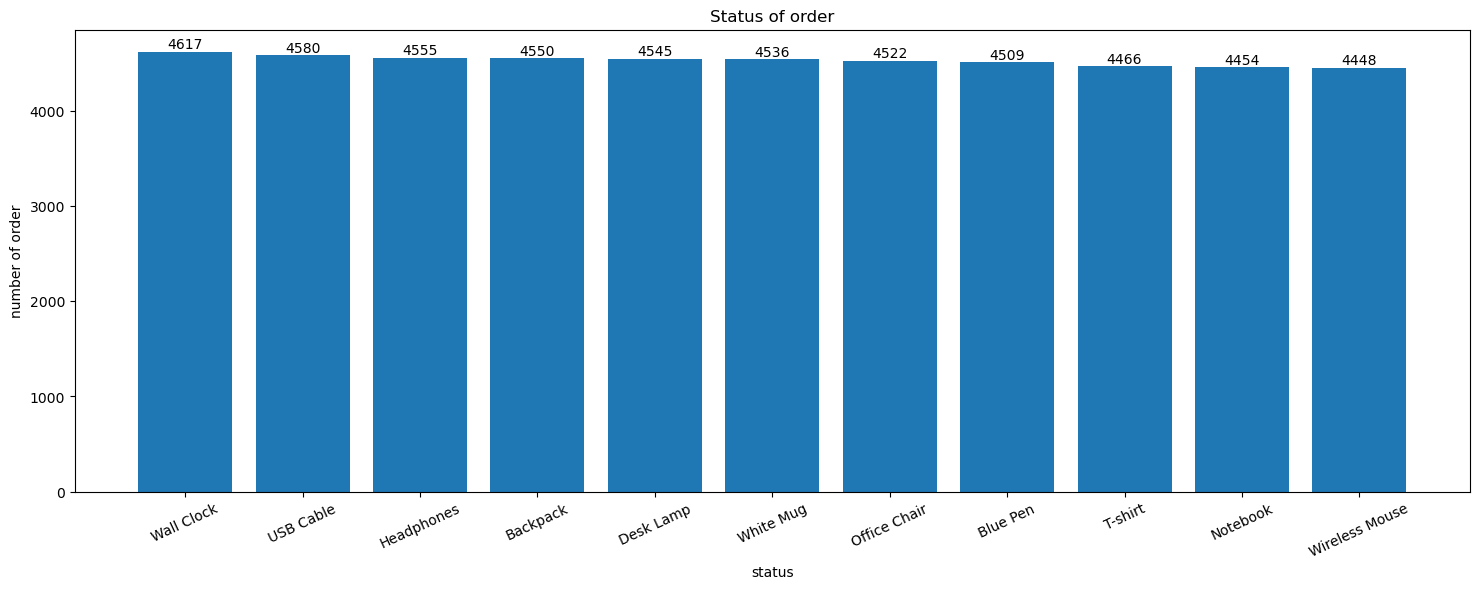

In [44]:
count_values=df['Description'].value_counts()
plt.figure(figsize=(18,6))
bar=plt.bar(count_values.index,count_values.values)
plt.title('Status of order')
plt.xlabel('status')
plt.ylabel('number of order')
plt.bar_label(bar)
plt.xticks(rotation=25)
plt.plot()